# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [3]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [4]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [5]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [6]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [7]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [8]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [9]:
hist[4]

0

The `Values` method returns the values:

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [11]:
hist.Items()

dict_items([(1, 1), (2, 2), (3, 1), (5, 1)])

So you can iterate the values and their frequencies like this:

In [12]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [13]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

No handles with labels found to put in legend.


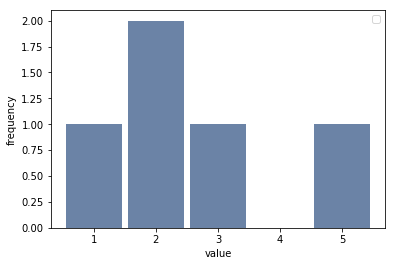

In [14]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [15]:

preg = nsfg.ReadFemPreg() #loading data
live = preg[preg.outcome == 1] #selecting oly live outcomes

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

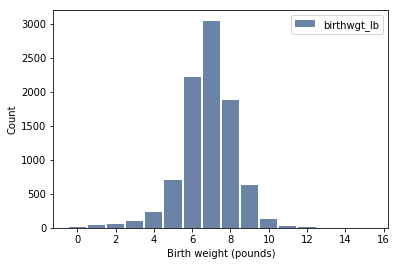

In [16]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb') #second parameter creates the legend box with the label
thinkplot.Hist(hist) #this is to show it
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [17]:
ages = np.floor(live.agepreg)

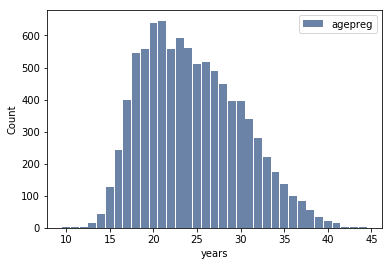

In [18]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

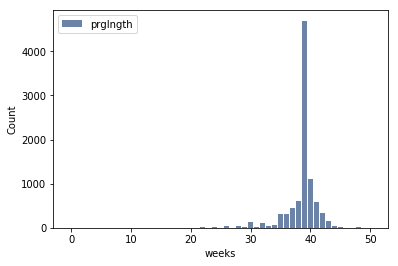

In [19]:
length = live.prglngth
hist = thinkstats2.Hist(length, label="prglngth")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks", ylabel="Count")
# Solution goes here

`Hist` provides smallest, which select the lowest values and their frequencies.

In [20]:
hist.Smallest(5)

[(0, 1), (4, 1), (9, 1), (13, 1), (17, 2)]

In [21]:
for weeks, freq in hist.Smallest(10): #asking for 10 smallest values
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [22]:
for weeks, freq in hist.Largest(10):
    print (weeks, freq)# Solution goes here

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [23]:
#print (live)
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
#print (firsts)
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

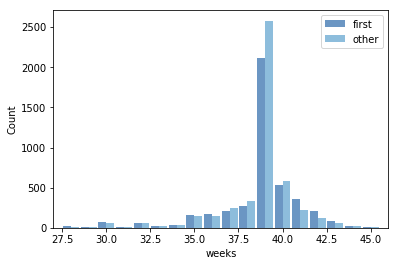

In [24]:
width = 0.45 #this is the width of the bar
thinkplot.PrePlot(2) #number of plots
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])


`Series` provides methods to compute summary statistics:

In [25]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [26]:
live.prglngth

0        39
1        39
2        39
3        39
4        39
5        38
6        40
7        42
8        39
9        35
10       39
11       39
12       37
15       33
16       33
17       39
19       41
20       39
21       39
23       39
24       39
25       39
26       39
27       42
28       37
29       40
31       41
32       38
33       39
34       39
         ..
13548    39
13551    38
13552    38
13553    39
13554    39
13555    39
13556    39
13557    39
13559    39
13560    40
13561    44
13562    38
13563    40
13564    39
13565    41
13566    40
13569    38
13570    39
13571    39
13572    39
13573    39
13574    39
13576    39
13578    39
13579    39
13581    39
13584    34
13588    39
13591    39
13592    39
Name: prglngth, Length: 9148, dtype: int64

Here are the mean and standard deviation:

In [27]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [28]:
var == std**2# Solution goes here

True

Here's are the mean pregnancy lengths for first babies and others:

In [29]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [30]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [31]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [32]:
CohenEffectSize(firsts["prglngth"], others["prglngth"])
# Solution goes here

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [38]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb) # first babies are on average lighter than other babies

-0.088672927072602

In [30]:
# Solution goes here

For the next few exercises, we'll load the respondent file:

In [39]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

No handles with labels found to put in legend.


Hist({14: 1160, 12: 658, 11: 647, 13: 623, 9: 607, 8: 606, 7: 583, 6: 559, 10: 468, 5: 445, 4: 421, 2: 301, 1: 299, 3: 266})


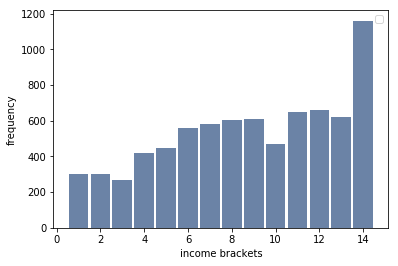

In [47]:
incomeHist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(incomeHist)
thinkplot.Config(xlabel = "income brackets", ylabel = "frequency")
print (incomeHist) # Solution goes here

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

No handles with labels found to put in legend.


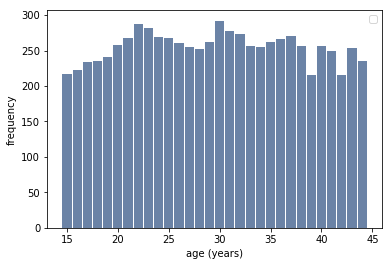

In [51]:
ageHist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(ageHist)
thinkplot.Config(xlabel = "age (years)", ylabel= "frequency")# Solution goes here

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

No handles with labels found to put in legend.


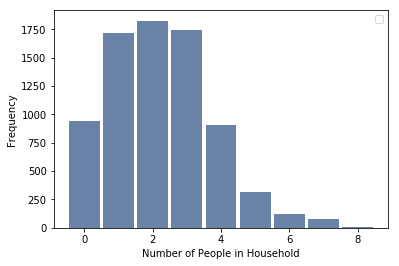

In [52]:
householdNum = resp["numfmhh"]# Solution goes here
householdNumHist = thinkstats2.Hist(householdNum)
thinkplot.Hist(householdNumHist)
thinkplot.Config(xlabel = "Number of People in Household", ylabel="Frequency")

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

No handles with labels found to put in legend.


Hist({0: 3230, 2: 1603, 1: 1519, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 10: 3, 9: 2, 22: 1, 16: 1})


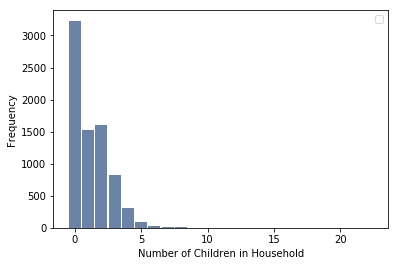

In [57]:
children = resp["parity"]# Solution goes here
childrenHist= thinkstats2.Hist(children)
print (childrenHist) #right skewed - longer right tail
thinkplot.Hist(childrenHist)
thinkplot.Config(xlabel="Number of Children in Household", ylabel = "Frequency")

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [54]:
childrenHist.Largest()# Solution goes here

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

No handles with labels found to put in legend.


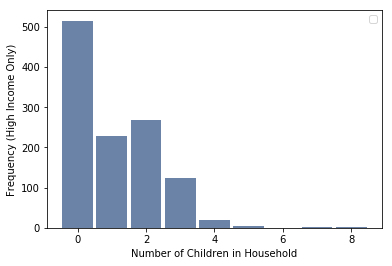

In [72]:
highIncome = resp[resp["totincr"] == 14] #returns a dataframe, need explanation!
highIncomeParity = highIncome["parity"]
highIncomeParityHist = thinkstats2.Hist(highIncomeParity)
thinkplot.Hist(highIncomeParityHist)
thinkplot.Config(xlabel = "Number of Children in Household", ylabel = "Frequency (High Income Only)")

Find the largest parities for high income respondents.

In [73]:
highIncomeParityHist.Largest()# Solution goes here

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [75]:
others = resp[resp["totincr"] < 14]# Solution goes here
othersParity = others["parity"]
highIncomeParity.mean(), othersParity.mean() #based on the data, we have observed that high income individuals have
#fewer on average number of children as opposed to other income brackets

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [76]:
CohenEffectSize(highIncome, others)# Solution goes here

caseid             0.025418
rscrinf            0.199674
rdormres          -0.179096
rostscrn           0.163992
rscreenhisp        0.333270
rscreenrace        0.162619
age_a              0.268979
age_r              0.268725
cmbirth           -0.267847
agescrn            0.268725
marstat           -0.369874
fmarstat          -0.366496
fmarit            -0.432210
evrmarry           0.301016
hisp               0.308814
hispgrp            0.039005
numrace           -0.023655
roscnt             0.154172
hplocale          -0.152301
manrel            -0.355741
fl_rage                 NaN
fl_rrace          -0.116019
fl_rhisp           0.002324
goschol            0.014436
vaca              -0.009430
higrade            0.621228
compgrd           -0.170536
havedip           -0.399764
dipged            -0.223415
cmhsgrad          -0.351945
                     ...   
inferth_i          0.031497
advice_i           0.031497
insem_i            0.031497
invitro_i          0.031497
endomet_i          0